# Derived-Term Automata of Multitape Expressions with Composition

This page is a complement to the paper [Derived-Term Automata of Multitape Expressions with Composition](https://www.lrde.epita.fr/wiki/Publications/demaille.17.sacs).  This page exists in several forms:
- [A Dynamic Notebook](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/SACS-2017.ipynb), which can be edited, played with
- [A static HTML page](http://www.lrde.epita.fr/dload/vcsn/latest/notebooks/SACS-2017.html), whose graphical rendering is always correct.

More information is available here:
- [Documentation for _expression_.expansion](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.expansion.ipynb)
- [Documentation for _expression_.derived_term](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.derived_term.ipynb)
- [Documentation of Vcsn](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/!Read-me-first.ipynb)
- [Vcsn's web page](http://vcsn.lrde.epita.fr)

You may change the cells, and run then.  To run a cell in a notebook, hit "Control-Enter" (in which case the focus stays on the same cell) or "Shift-Enter" (focus goes to the next cell).  Beware that depending on the requested operations, Vcsn may generate and compile code, which may be a really slow process on small machines (about a minute): be patient!  However, the code is compiled only once: successive uses will be way faster.

To run all the cells anew, select "Restart & Run All" in the "Kernel" menu above.
$\newcommand{\Ed}{\mathsf{E}}
\newcommand{\Fd}{\mathsf{F}}
\newcommand{\coloneqq}{\mathrel{\vcenter{:}}=}$

In [1]:
import vcsn
vcsn.setenv(SEED=1)
vcsn.table = vcsn.ipython.table
# There will be examples with benchmarks, tell the test suite to ignore the durations.
# global ignore: \d+ms

# Introduction: Motivating Examples
First we introduce the _context_ we are interested in: labels are letter-or-empty-word (`lan`), two tapes (`lat`), weights are in the tropical semiring $\mathbb{Z}_{\min} := \langle \mathbb{Z}, \min, +, \infty, 0 \rangle$.

In [2]:
zmin2 = vcsn.context('lat<lan, lan>, zmin')
zmin2

{...}? x {...}? -> Zmin

The following examples show how the multiplication and addition of $\mathbb{Z}_{\min}$ behave:

In [3]:
zmin2.weight('1') * zmin2.weight('3')

4

In [4]:
zmin2.weight('1') + zmin2.weight('3')

1

The first automaton, $\mathcal{A}$, is obtained from the following rational expression (the empty word is noted `\e` in Vcsn, and rendered $\varepsilon$ even as an expression, whereas in the paper it is written $\mathsf{1}$).

In [5]:
zmin2.expression(r'(a|a+b|b+⟨1⟩(\e|(a+b)+(a+b)|\e))∗')

(a|a+b|b+<1>(\e|(a+b)+(a+b)|\e))*

Or, using syntactic sugar ($a \coloneqq a|a$, $[ab] \coloneqq a+b$):

In [6]:
e1 = zmin2.expression(r'([ab] + ⟨1⟩(\e|[ab] + [ab]|\e))∗')
e1

(a|a+b|b+<1>(\e|(a+b)+(a+b)|\e))*

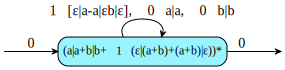

In [7]:
a1 = e1.derived_term()
a1

Admittedly, the display of multitape labels on transition could be improved.  The rather cryptic `[ε|a-a|εb|ε]` denotes `ε|a+ε|b+a|ε+b|ε`.  This will be addressed in future versions of Vcsn.

Ng's automaton is:

In [8]:
e2 = zmin2.expression('[ab]∗ (⟨1⟩(\e|[ab] + [ab]|\e) + ⟨2⟩(a|b + b|a))∗')
e2

(a|a+b|b)*(<2>(a|b+b|a)+<1>(\e|(a+b)+(a+b)|\e))*

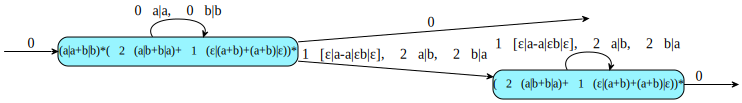

In [9]:
e2.derived_term()

Or, cleaned from state decorations:

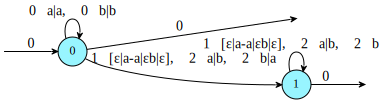

In [10]:
a2 = e2.automaton('expansion')
a2

Mohri factors his automaton $\mathcal{A}$ in the composition of $\mathcal{A}_1$ and $\mathcal{A}_2$:

In [11]:
f1 = zmin2.expression('([ab] + ⟨1⟩(\e|i + [ab]|s))∗')
f2 = zmin2.expression('([ab] + i|[ab] + s|\e)∗')
f = f1.compose(f2)
vcsn.table([["Name", "Expression", "Automaton"],
            ["$\mathcal{A}_1$", f1, f1.derived_term()],
            ["$\mathcal{A}_2$", f2, f2.derived_term()],
            ["$\mathcal{A}$",   f,  f.derived_term()]])

Name,Expression,Automaton
$\mathcal{A}_1$,"$\left(a|a + b|b + \left\langle 1 \right\rangle \,\left(\varepsilon|i + \left. \left(a + b\right) \middle| s \right. \right)\right)^{*}$","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- I0 --> I0 <!-- 0 --> 0 (a|a+b|b+⟨1⟩(ε|i+(a+b)|s))* <!-- I0->0 --> I0->0 ⟨0⟩ <!-- F0 --> F0 <!-- 0->F0 --> 0->F0 ⟨0⟩ <!-- 0->0 --> 0->0 ⟨1⟩[ε|ia|sb|s], ⟨0⟩a|a, ⟨0⟩b|b"
$\mathcal{A}_2$,$\left(a|a + b|b + s|\varepsilon + \left. i \middle| \left(a + b\right) \right. \right)^{*}$,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- I0 --> I0 <!-- 0 --> 0 (a|a+b|b+s|ε+i|(a+b))* <!-- I0->0 --> I0->0 ⟨0⟩ <!-- F0 --> F0 <!-- 0->F0 --> 0->F0 ⟨0⟩ <!-- 0->0 --> 0->0 ⟨0⟩[a|ab|bi|ai|bs|ε]"
$\mathcal{A}$,"$\left(a|a + b|b + \left\langle 1 \right\rangle \,\left(\varepsilon|i + \left. \left(a + b\right) \middle| s \right. \right)\right)^{*}@\left(a|a + b|b + s|\varepsilon + \left. i \middle| \left(a + b\right) \right. \right)^{*}$","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- I0 --> I0 <!-- 0 --> 0 (a|a+b|b+⟨1⟩(ε|i+(a+b)|s))*@(a|a+b|b+s|ε+i|(a+b))* <!-- I0->0 --> I0->0 ⟨0⟩ <!-- F0 --> F0 <!-- 0->F0 --> 0->F0 ⟨0⟩ <!-- 0->0 --> 0->0 ⟨1⟩[ε|aε|ba|εb|ε], ⟨0⟩a|a, ⟨0⟩b|b"


The resulting automaton is exactly the automaton $\mathcal{A}$.

# Section 2.2: Weighted Rational Expressions
The set of operators supported by Vcsn is quite large, see the [documentation](Expressions.ipynb) for details.  We will show a few simple examples.

We start with a simple example of a single tape expression whose labels are letters-or-empty-word (`lan`), and weights are rational numbers.  We first introduce what in Vcsn is called a [context](Contexts.ipynb) which is simply an object to type automata, expressions, expansions, etc.

In [12]:
q = vcsn.context('lan, q')
q

{...}? -> Q

From this context, we can build (typed) expressions:

In [13]:
e = q.expression('(<1/6>a*+<1/3>b*)*')
e

(<1/6>a*+<1/3>b*)*

Let's introduce `qexp` as a shorthand to build an expression from a string.

In [14]:
qexp = q.expression
qexp('(<1/6>a*+<1/3>b*)*')

(<1/6>a*+<1/3>b*)*

The usual ${}^+$ quantifier ($\Ed^+ \coloneqq \Ed\Ed^*$) is written `{+}`, to disambiguate from the binary operator ($\Ed + \Fd$):

In [15]:
qexp('a{+}+b{+}')

aa*+bb*

The following examples show the trivial identities in action.

In [16]:
def example(*es):
    import pandas as pd
    pd.options.display.max_colwidth = 0
    ids = ['none', 'trivial']
    res = [[e] + ['${:x}$'.format(qexp(e, id)) for id in ids]
           for e in es]
    return pd.DataFrame(res, columns=['.' + ' ' * 20 + id.title() for id in ['input'] + ids])
example('\z+a', 'a+a', '\za', '\ea', '(\e\za+\z)*')

,. Input,. None,. Trivial
0,\z+a,$\emptyset + a$,$a$
1,a+a,$a + a$,$a + a$
2,\za,"$\emptyset \, a$",$\emptyset$
3,\ea,"$\varepsilon \, a$",$a$
4,(\e\za+\z)*,"$\left(\varepsilon \, \left(\emptyset \, a\right) + \emptyset\right)^{*}$",$\varepsilon$


Vcsn also provides Python [operators to assemble expressions](expression.Operators.ipynb).

In [17]:
('1/6' * qexp('a').star() + '1/3' * qexp('b').star()).star()

(<1/6>a*+<1/3>b*)*

The Python operator `|` builds a multitape expression from simple tape ones, and the Python operator `@` denotes composition.  As a matter of fact, the reason why composition is denoted $@$ in Vcsn is because that is the only remaining operator available in Python.  Besides, more beautiful symbols, such as $\circ$ for instance, are technical to type.

In [18]:
qexp('a*') | qexp('b*')

a*|b*

In [19]:
(qexp('a*') | qexp('b')) @ (qexp('b') | qexp('c*'))

a*|b@b|c*

# Section 3: Rational Expansions
We start with a simple example of a single tape expression whose labels are letters-or-empty-word (`lan`), and weights are rational numbers.

In [20]:
e = qexp('a+<2>bc*')
e

a+<2>(bc*)

Its expansion is:

In [21]:
e.expansion()

a.[\e] + b.[<2>c*]

And its derived-term automaton (contrary to the paper, in Vcsn the empty expression is denoted $\varepsilon$ instead of $\mathsf{1}$):

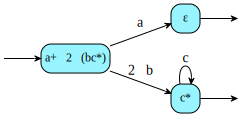

In [22]:
e.derived_term()

which is smaller than its [standard automaton](automaton.standard.ipynb):

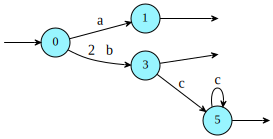

In [23]:
e.standard()

The following example demonstrates how successors of a state are computed.  It uses the [shuffle operator](expression.shuffle.ipynb), denoted `:`, for illustration.

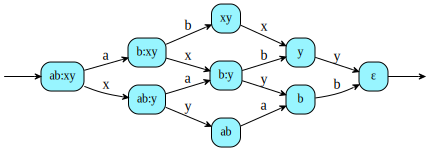

In [24]:
qexp('ab:xy').derived_term()

# Examples 1 to 4: A Simple Multitape Expression (also Figure 1)

Labels are pairs of letter-or-empty-word (`lat<lan, lan>`), and weights are rational numbers (`q`).

In [25]:
q2 = vcsn.context('lat<lan(abcde), lan(xy)>, q')
q2

{abcde}? x {xy}? -> Q

The expression $\mathsf{E}_1$ is:

In [26]:
e1 = q2.expression('⟨4⟩ade*|x + ⟨3⟩bde*|x + ⟨2⟩ace*|xy + ⟨6⟩bce*|xy')
e1

<4>(ade*)|x+<3>(bde*)|x+<2>(ace*)|xy+<6>(bce*)|xy

Its expansion is:

In [27]:
e1.expansion()

a|x.[<2>ce*|y + <4>de*|\e] + b|x.[<6>ce*|y + <3>de*|\e]

The derived-term automaton of $\mathsf{E}_1$, $\mathcal{A}_{\mathsf{E}_1}$, is:

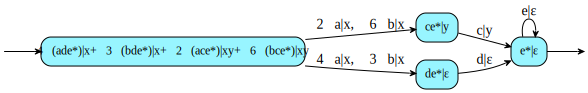

In [28]:
a1 = e1.derived_term()
a1

The ten shortest accepted multitape words are:

In [29]:
a1.shortest(10)

<2>ac|xy + <4>ad|x + <6>bc|xy + <3>bd|x + <2>ace|xy + <4>ade|x + <6>bce|xy + <3>bde|x + <2>acee|xy + <4>adee|x

# Example 5: An Exponential Number of States
We introduce a three-tape context.  Unfortunately the automatic graphical rendering is poor.

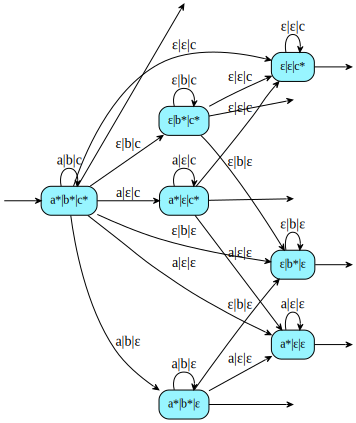

In [30]:
q3 = vcsn.context('lat<lan, lan, lan>, q')
a3 = q3.expression('a*|b*|c*').derived_term()
a3

From multitape automata currently Vcsn extracts only simple-tape expressions over multitape generators (e.g. $(\varepsilon | a)^*$) instead of general mutitape expressions (e.g. $\varepsilon | a^*$):

In [31]:
a3.expression()

(a|b|c)*(\e+(\e|\e|c)(\e|\e|c)*+(\e|b|\e)(\e|b|\e)*+(a|\e|\e)(a|\e|\e)*+(\e|b|c)(\e|b|c)*(\e+(\e|\e|c)(\e|\e|c)*+(\e|b|\e)(\e|b|\e)*)+(a|\e|c)(a|\e|c)*(\e+(\e|\e|c)(\e|\e|c)*+(a|\e|\e)(a|\e|\e)*)+(a|b|\e)(a|b|\e)*(\e+(\e|b|\e)(\e|b|\e)*+(a|\e|\e)(a|\e|\e)*))

In the case of the corresponding five-tape expression, the generated graphical rendering is so messy that it is totally useless (try it if you want!). So instead of displaying the automaton, we list its states.

In [32]:
q5 = vcsn.context('lat<lan(a), lan(b), lan(c), lan(d), lan(e)>, q')
e5 = q5.expression('a*|b*|c*|d*|e*')
e5

a*|b*|c*|d*|e*

In [33]:
e5.expansion()

<1> + \e|\e|\e|\e|e.[\e|\e|\e|\e|e*] + \e|\e|\e|d|\e.[\e|\e|\e|d*|\e] + \e|\e|\e|d|e.[\e|\e|\e|d*|e*] + \e|\e|c|\e|\e.[\e|\e|c*|\e|\e] + \e|\e|c|\e|e.[\e|\e|c*|\e|e*] + \e|\e|c|d|\e.[\e|\e|c*|d*|\e] + \e|\e|c|d|e.[\e|\e|c*|d*|e*] + \e|b|\e|\e|\e.[\e|b*|\e|\e|\e] + \e|b|\e|\e|e.[\e|b*|\e|\e|e*] + \e|b|\e|d|\e.[\e|b*|\e|d*|\e] + \e|b|\e|d|e.[\e|b*|\e|d*|e*] + \e|b|c|\e|\e.[\e|b*|c*|\e|\e] + \e|b|c|\e|e.[\e|b*|c*|\e|e*] + \e|b|c|d|\e.[\e|b*|c*|d*|\e] + \e|b|c|d|e.[\e|b*|c*|d*|e*] + a|\e|\e|\e|\e.[a*|\e|\e|\e|\e] + a|\e|\e|\e|e.[a*|\e|\e|\e|e*] + a|\e|\e|d|\e.[a*|\e|\e|d*|\e] + a|\e|\e|d|e.[a*|\e|\e|d*|e*] + a|\e|c|\e|\e.[a*|\e|c*|\e|\e] + a|\e|c|\e|e.[a*|\e|c*|\e|e*] + a|\e|c|d|\e.[a*|\e|c*|d*|\e] + a|\e|c|d|e.[a*|\e|c*|d*|e*] + a|b|\e|\e|\e.[a*|b*|\e|\e|\e] + a|b|\e|\e|e.[a*|b*|\e|\e|e*] + a|b|\e|d|\e.[a*|b*|\e|d*|\e] + a|b|\e|d|e.[a*|b*|\e|d*|e*] + a|b|c|\e|\e.[a*|b*|c*|\e|\e] + a|b|c|\e|e.[a*|b*|c*|\e|e*] + a|b|c|d|\e.[a*|b*|c*|d*|\e] + a|b|c|d|e.[a*|b*|c*|d*|e*]

In [34]:
a5 = e5.derived_term()
a5.states()

['a*|b*|c*|d*|e*',
 'a*|b*|c*|d*|ε',
 'a*|b*|c*|ε|e*',
 'a*|b*|c*|ε|ε',
 'a*|b*|ε|d*|e*',
 'a*|b*|ε|d*|ε',
 'a*|b*|ε|ε|e*',
 'a*|b*|ε|ε|ε',
 'a*|ε|c*|d*|e*',
 'a*|ε|c*|d*|ε',
 'a*|ε|c*|ε|e*',
 'a*|ε|c*|ε|ε',
 'a*|ε|ε|d*|e*',
 'a*|ε|ε|d*|ε',
 'a*|ε|ε|ε|e*',
 'a*|ε|ε|ε|ε',
 'ε|b*|c*|d*|e*',
 'ε|b*|c*|d*|ε',
 'ε|b*|c*|ε|e*',
 'ε|b*|c*|ε|ε',
 'ε|b*|ε|d*|e*',
 'ε|b*|ε|d*|ε',
 'ε|b*|ε|ε|e*',
 'ε|b*|ε|ε|ε',
 'ε|ε|c*|d*|e*',
 'ε|ε|c*|d*|ε',
 'ε|ε|c*|ε|e*',
 'ε|ε|c*|ε|ε',
 'ε|ε|ε|d*|e*',
 'ε|ε|ε|d*|ε',
 'ε|ε|ε|ε|e*']

## Example 6: A Sed-like Substitution

In [35]:
e2 = q2.expression('(a{+}|x + b{+}|y)*')
e2

(aa*|x+bb*|y)*

In [36]:
e2.expansion()

<1> + a|x.[(a*|\e)(aa*|x+bb*|y)*] + b|y.[(b*|\e)(aa*|x+bb*|y)*]

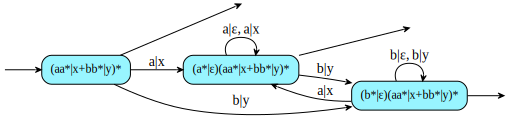

In [37]:
a2 = e2.derived_term()
a2

Again, the extracted expression is less readable than the one we started from.

In [38]:
a2.expression()

\e+(a|x)(a|\e+a|x)*+(b|y+(a|x)(a|\e+a|x)*(b|y))(b|\e+b|y+(a|x)(a|\e+a|x)*(b|y))*(\e+(a|x)(a|\e+a|x)*)

## A More Complex Expression
The previous examples often looked like sed-like substitutions, in the sense that the first tape was often a composite expression, but the second tape a simple label.  There is no such limitation.

In [39]:
e = q2.expression('(<2>[ab])* | (<3>[xy])*')
e

(<2>(a+b))*|(<3>(x+y))*

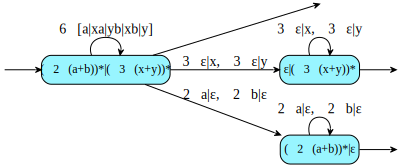

In [40]:
a = e.derived_term()
a

In [41]:
a.shortest(20)

\e|\e + <3>\e|x + <3>\e|y + <2>a|\e + <6>a|x + <6>a|y + <2>b|\e + <6>b|x + <6>b|y + <9>\e|xx + <9>\e|xy + <9>\e|yx + <9>\e|yy + <18>a|xx + <18>a|xy + <18>a|yx + <18>a|yy + <18>b|xx + <18>b|xy + <18>b|yx

## Section 5.3: Derived-Term Automaton with Composition

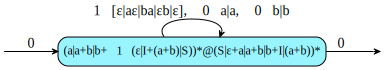

In [42]:
f1 = zmin2.expression('([ab] + ⟨1⟩(\e|I + [ab]|S))∗')
f2 = zmin2.expression('([ab] + I|[ab] + S|\e)∗')
f = f1 @ f2
f.derived_term()

Here we show, as will be discussed in Section 6.2, the role played by identities.  Here, they are fully disabled (via the `'none'` argument).

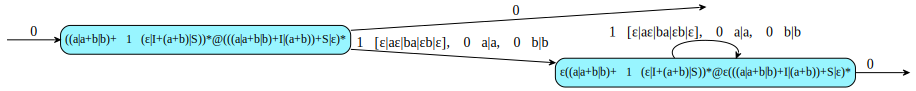

In [43]:
f1 = zmin2.expression('([ab] + ⟨1⟩(\e|I + [ab]|S))∗', 'none')
f2 = zmin2.expression('([ab] + I|[ab] + S|\e)∗', 'none')
f = f1 @ f2
f.derived_term()

Then we show an example with the endmarker (as discussed in Section 6.4).

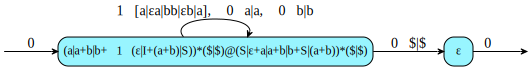

In [44]:
f1 = zmin2.expression('([ab] + ⟨1⟩(\e|I + [ab]|S))∗   ($|$)')
f2 = zmin2.expression('([ab] + S|[ab] + S|\e)∗       ($|$)')
f = f1 @ f2
f.derived_term()

### Example 8
In this example we used symbolic weights, $k, h$.  To simulate this we introduce expressions whose weights are expressions (whose weights are in $\mathbb{Q}$):

In [45]:
eset2 = vcsn.context('lat<lan(ab), lan(ab)>, expressionset<lan(kh), q>')
eset2

{ab}? x {ab}? -> RatE[{hk}? -> Q]

Then we build and display the expression, its expansion, and its derived-term automaton.

(<k>\e|a)*@(<h>aa|\e)*

<\e> + \e|\e.[<kh>(<k>\e|a)*@(a|\e)(<h>aa|\e)*]

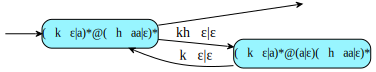

In [46]:
e = eset2.expression('(⟨k⟩\e|a)∗ @ (⟨h⟩aa|\e)∗', 'trivial')
vcsn.display(e, e.expansion(), e.derived_term())

(<k>\e|a)*@(<h>aa|\e)*

<\e> + \e|\e.[<k>(\e|a)(<k>\e|a)*@\e + <h>\e@(a|\e)((a|\e)(<h>aa|\e)*) + <kh>(<k>\e|a)*@(a|\e)(<h>aa|\e)*]

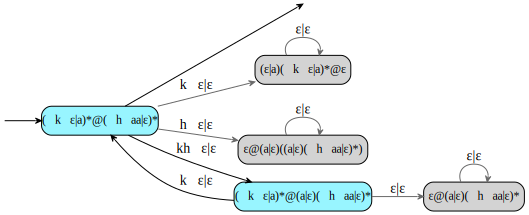

In [47]:
vcsn.setenv(OLDWAY=0, DENORM=1)
e = eset2.expression('(⟨k⟩\e|a)∗ @ (⟨h⟩aa|\e)∗', 'trivial')
vcsn.display(e, e.expansion(), e.derived_term())

## Section 6.1: Discussion on the Validity of Automata
The following function takes a rational expression, and generates derived-term automata from denormalized expansions (simpler equation, but generates many spontaneous transitions), and from "normal" expansions.  The former are often simpler, but may generate invalid automata.

In [48]:
vcsn.setenv(DENORM=0, OLDWAY=0)
import vcsn
def compare(e, name=None, ctx='lan, q'):
    if not isinstance(e, vcsn.expression):
        e = vcsn.context(ctx).expression(e, identities='trivial')
    if name:
        e_named = e.name(name)
    else:
        e_named = e
    a_norm = e_named.derived_term()
    vcsn.setenv(NAIVE_MUL=1, NAIVE_STAR=1)
    a_denorm = e_named.derived_term()
    vcsn.setenv(NAIVE_MUL=0, NAIVE_STAR=0)
    return vcsn.table([['Expression', 'Denormalized', 'Normal'], [e, a_denorm, a_norm]])
compare('a*b*c*')

[['Expression', 'Denormalized', 'Normal'],
 [a*(b*c*),
  expression_automaton<mutable_automaton<context<letterset<char_letters>, q>>>,
  expression_automaton<mutable_automaton<context<letterset<char_letters>, q>>>]]

In [49]:
compare('(<1/2>\e)*')

Expression,Denormalized,Normal
"$\left( \left\langle \frac{1}{2} \right\rangle \,\varepsilon\right)^{*}$","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- I0 --> I0 <!-- 0 --> 0 (⟨1/2⟩ε)* <!-- I0->0 --> I0->0 <!-- F0 --> F0 <!-- 0->F0 --> 0->F0 <!-- 0->0 --> 0->0 ⟨1/2⟩ε","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- I0 --> I0 <!-- 0 --> 0 (⟨1/2⟩ε)* <!-- I0->0 --> I0->0 <!-- F0 --> F0 <!-- 0->F0 --> 0->F0 ⟨2⟩"


In [50]:
compare('(a*b* + <-1>\e)*', name='E')

[['Expression', 'Denormalized', 'Normal'],
 [(a*b*+<-1>\e)*,
  expression_automaton<mutable_automaton<context<letterset<char_letters>, q>>>,
  expression_automaton<mutable_automaton<context<letterset<char_letters>, q>>>]]

In [51]:
compare('((<1/2>\e)* + <-2>\e)*', name='E')

[['Expression', 'Denormalized', 'Normal'],
 [((<1/2>\e)*+<-2>\e)*,
  expression_automaton<mutable_automaton<context<letterset<char_letters>, q>>>,
  expression_automaton<mutable_automaton<context<letterset<char_letters>, q>>>]]

In [52]:
compare('((\e|ab @ ab|\e) + <-1>\e)*', ctx='lat<lan, lan>, q', name='E')

[['Expression', 'Denormalized', 'Normal'],
 [(\e|ab@ab|\e+<-1>\e)*,
  expression_automaton<mutable_automaton<context<lat<letterset<char_letters>, letterset<char_letters>>, q>>>,
  expression_automaton<mutable_automaton<context<lat<letterset<char_letters>, letterset<char_letters>>, q>>>]]

## Section 6.2: Discussion on Identities

In [53]:
vcsn.setenv(DENORM=0, OLDWAY=0)
def dterm(e):
    '''The derived-term of `e`, or the first line of the error if
    it fails.'''
    try:
        return e.derived_term()
    except RuntimeError as e:
        return 'Error: ' + str(e).split('\n')[0]
def compare(e, ctx='lan, q'):
    exp = vcsn.context(ctx).expression
    return vcsn.table([['No identities: Expression', 'No identities: Automaton'],
                       [exp(e, 'none'), dterm(exp(e, 'none'))],
                       ['Trivial identities: Expression', 'Trivial identities: Automaton'],
                       [exp(e, 'trivial'), dterm(exp(e, 'trivial'))]])
compare('a*')

[['No identities: Expression', 'No identities: Automaton'],
 [a*,
  expression_automaton<mutable_automaton<context<letterset<char_letters>, q>>>],
 ['Trivial identities: Expression', 'Trivial identities: Automaton'],
 [a*,
  expression_automaton<mutable_automaton<context<letterset<char_letters>, q>>>]]

In [54]:
compare('a + ⟨0⟩\e* + \z\e*')

No identities: Expression,No identities: Automaton
"$\left(a + \left\langle 0 \right\rangle \,{\varepsilon}^{*}\right) + \emptyset \, {\varepsilon}^{*}$",Error: Q: value is not starrable: 1
Trivial identities: Expression,Trivial identities: Automaton
$a$,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.40.1 (20161225.0304) --> <!-- Title: %3 Pages: 1 --> %3 <!-- I0 --> I0 <!-- 0 --> 0 a <!-- I0->0 --> I0->0 <!-- F1 --> F1 <!-- 1 --> 1 ε <!-- 0->1 --> 0->1 a <!-- 1->F1 --> 1->F1"


In [55]:
compare('abc\z')

[['No identities: Expression', 'No identities: Automaton'],
 [a(b(c\z)),
  expression_automaton<mutable_automaton<context<letterset<char_letters>, q>>>],
 ['Trivial identities: Expression', 'Trivial identities: Automaton'],
 [\z,
  expression_automaton<mutable_automaton<context<letterset<char_letters>, q>>>]]

## Runtime Performances
We compare the quality of the generated automata (smaller is better) and the duration of the generation procedure (again, smaller is better).  Vcsn feature two generation procedures for multitape expressions: derived-term, and "inductive".

"Inductive" is a simple recursive translation of the rational expression that applies the corresponding operation on the automata.  For single-tape expressions, it uses the "standard" operations on automata, which are the ones used to implement the [expression.standard](expression.standard.ipynb) algorithm.
The comparison will be performed on twenty randomly generated expressions.

In [56]:
zmin2 = vcsn.context('lat<lan, lan>, zmin')

from vcsn.tools import _timeit
def timeit(fun):
    'Run `fun` a number of times, and return its fastest run in milliseconds.'
    return '{}ms'.format(round(_timeit(lambda: fun())[1]))

title = ['Rational Expression',
         'DT: transitions', 'Ind: transitions',
         'DT: states', 'Ind: states',
         'DT: duration', 'Ind: duration']

def compare(e):
    # Make sure this is an object expression, not just a string.
    if not isinstance(e, vcsn.expression):
        e = zmin2.expression(e)
    # Compute its derived-term automaton.
    a1 = e.automaton('expansion')
    t1 = timeit(lambda: e.automaton('expansion'))
    # Compute another automaton by mapping operators to one of their natural implementation.
    # In the case of single-tape automata, this yield the standard (aka Glushkov) automaton.
    a2 = e.automaton('inductive')
    t2 = timeit(lambda: e.automaton('inductive'))
    # Return their numbers of states.
    return [e,
            a1.info('number of transitions'), a2.info('number of transitions'), 
            a1.state_number(), a2.state_number(),
            t1, t2]

In [57]:
# ignore cell
zmin2 = vcsn.context('lat<lan(ab), lan(ab)>, zmin')
res = [title]
for i in range(20):
    e = zmin2.random_expression('+, ., *=.2, w., .w, w="min=0, max=3", |=.5, @', length=20)
    c = compare(e)
    res.append(c)
vcsn.table(res)

Rational Expression,DT: transitions,Ind: transitions,DT: states,Ind: states,DT: duration,Ind: duration
"$\left(\varepsilon|b\right) \, \left(\varepsilon|a\right) + \left. \left\langle 3 \right\rangle \,a \middle| a \right. $",3,3,3,4,33ms,30ms
"$\left(\varepsilon + \varepsilon|b + a|a\right) \, \left(b|\varepsilon\right)@ \left\langle 1 \right\rangle \,\left( \left. \left\langle 2 \right\rangle \,\left(a \, b\right) \middle| \left\langle 2 \right\rangle \,\left(\varepsilon + a\right) \right. \right)$",0,5,0,6,48ms,90ms
"$\left(b|b\right) \, \left(\left(\varepsilon|b\right) \, \left(\left(\varepsilon + \varepsilon|b\right)@\varepsilon|a\right)@\left(\varepsilon|a + b|a\right)\right)$",0,3,0,4,31ms,75ms
"$ \left\langle 6 \right\rangle \,\left( \left. \left( \left\langle 5 \right\rangle \,\left(b \, a\right)\right)^{*} \middle| \left(\varepsilon + {a}^{*}\right) \right. \right)$",11,11,6,6,148ms,46ms
"$ \left\langle 4 \right\rangle \,\left(\left(\varepsilon|b\right) \, \left( \left\langle 2 \right\rangle \,\varepsilon + \left. \left\langle 1 \right\rangle \,\left({a}^{2}\right) \middle| \left( \left\langle 1 \right\rangle \,\varepsilon + a\right) \right. \right)^{*}\right)$",4,7,3,5,48ms,65ms
"$ \left\langle 3 \right\rangle \,\left(\left(\varepsilon@\left(a|\varepsilon\right) \, \left(\varepsilon|a\right)\right) \, \left(\left( \left\langle 3 \right\rangle \,\left(a|\varepsilon\right) + b|b\right)@\left(\varepsilon + b|\varepsilon\right)\right)\right)$",0,0,0,3,13ms,76ms
"$ \left\langle 3 \right\rangle \,\left( \left\langle 1 \right\rangle \,\left( \left\langle 2 \right\rangle \,\varepsilon + a|b\right)@ \left. \left\langle 2 \right\rangle \,\varepsilon \middle| \left(\varepsilon + b\right) \right. \right)$",1,1,2,2,36ms,50ms
"$ \left. \left( \left\langle 6 \right\rangle \,\left(\varepsilon + a + b\right)\right)^{*} \middle| \left\langle 2 \right\rangle \,\left(a + \left( \left\langle 3 \right\rangle \,b\right)^{*}\right) \right. $",16,27,5,9,153ms,61ms
"$ \left\langle 2 \right\rangle \,\left( \left. b \middle| \left\langle 3 \right\rangle \,b \right. @\left(\varepsilon + b|b\right) \, \left(b|\varepsilon\right)\right)$",1,2,2,3,33ms,52ms
"$ \left\langle 5 \right\rangle \,\left( \left. \left(\varepsilon + \left\langle 8 \right\rangle \,b\right) \middle| \left\langle 4 \right\rangle \,\left(\varepsilon + a\right) \right. \right)$",3,3,2,4,40ms,34ms


Unfortunately, random expressions are rarely interesting (as can be seen by the number of transitions).

Now we compare the behavior of both algorithms on a familly of rational expressions: $n \mapsto [ab]^* (a|b)^n [ab]^*$.

In [58]:
res = [title]
for i in range(20):
    e = zmin2.expression('[ab]*  (a|b){{{}}}  [ab]*'.format(i))
    res.append(compare(e))
vcsn.table(res)

Rational Expression,DT: transitions,Ind: transitions,DT: states,Ind: states,DT: duration,Ind: duration
${\left(a|a + b|b\right)^{*}}^{2}$,6,16,2,5,36ms,45ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right) \, \left(a|a + b|b\right)^{*}$",5,15,2,6,31ms,56ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{2} \, \left(a|a + b|b\right)^{*}$",6,16,3,7,35ms,68ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{3} \, \left(a|a + b|b\right)^{*}$",7,17,4,8,42ms,82ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{4} \, \left(a|a + b|b\right)^{*}$",8,18,5,9,45ms,95ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{5} \, \left(a|a + b|b\right)^{*}$",9,19,6,10,49ms,109ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{6} \, \left(a|a + b|b\right)^{*}$",10,20,7,11,54ms,123ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{7} \, \left(a|a + b|b\right)^{*}$",11,21,8,12,60ms,141ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{8} \, \left(a|a + b|b\right)^{*}$",12,22,9,13,63ms,155ms
"$\left(a|a + b|b\right)^{*} \, \left(a|b\right)^{9} \, \left(a|a + b|b\right)^{*}$",13,23,10,14,69ms,174ms


## Section 6.6: Discussion on the Performances
In this section, we compare the size of automata generated either using the "standard automaton" construction (aka, Glushkov automata), or the expansion-based derived-term automaton as exposed in the paper.

In [59]:
def exp(e, ctx=None):
    '''Make an expression from `e`, using the context `ctx`
    if `e` is not already an expression.'''
    if isinstance(e, vcsn.expression):
        return e
    else:
        if not isinstance(ctx, vcsn.context):
            ctx = vcsn.context(ctx)
        return ctx.expression(e)

def compare_one(e):
    '''Compare the sizes of the derived-term, denormalized derived-term, and inductive
    automata from exprssion `e`.'''
    e = exp(e, ctx=zmin2)
    ind = e.inductive()
    dte = e.derived_term()
    vcsn.setenv(OLDWAY=1, DENORM=1)
    den = e.derived_term()
    vcsn.setenv(OLDWAY=0, DENORM=0)
    return [e, 
            dte.info('number of states'), dte.info('number of transitions'),
            den.info('number of states'), den.info('number of transitions'),
            ind.info('number of states'), ind.info('number of transitions')]

def compare(*es):
    '''Compare the sizes of the derived-term, denormalized derived-term, and inductive
    automata for each expression in `es`.'''
    res = [['Expression',
            'DTerm states', 'Dterm transitions',
            'Denorm DTerm states', 'Denorm Dterm transitions',
            'Inductive states', 'Inductive transitions']]
    for e in es:
        res.append(compare_one(e))
    return res

zmin = vcsn.context('lan, zmin')
zmin2 = zmin|zmin
eset2 = vcsn.context('lat<lan, lan>, expressionset<lan, q>')
q = vcsn.context('lan, q')
q3 = vcsn.context('lat<lan, lan, lan>, q')

res = compare(# Introduction
              exp('([ab] + ⟨1⟩(\e|[ab] + [ab]|\e))∗', zmin2),
              exp('[ab]∗  (⟨1⟩(\e|[ab] + [ab]|\e) + ⟨2⟩(a|b + b|a))∗', zmin2),
              exp('([ab] + ⟨1⟩(\e|I + [ab]|S))∗', zmin2),
              exp('([ab] + I|[ab] + S|\e)∗', zmin2),
              exp('(([ab] + ⟨1⟩(\e|I + [ab]|S))∗)  @  (([ab] + I|[ab] + S|\e)∗)', zmin2),
              exp('⟨4⟩ade*|x + ⟨3⟩bde*|x + ⟨2⟩ace*|xy + ⟨6⟩bce*|xy', zmin2),
              exp('a + ⟨2⟩bc∗', ctx=zmin), # Section 3.
              exp('a*|b*|c*', ctx=q3), # Example 4.
              exp('a*|b*|c*|d*|e*', ctx='lat<lan(a), lan(b), lan(c), lan(d), lan(e)>, q'), # Example 4
              exp('(a{+}|x + b{+}|y)*', zmin2),  # Example 5
              exp('(⟨k⟩\e|a)∗ @ (⟨h⟩aa|\e)∗', ctx=eset2), # Example 8, Section 5.3,
              exp('a*b*c*', ctx=q), # Section 6.1
              exp('(<1/2>\\e)*', ctx=q), # Section 6.1
              exp('(a*b* + <-1>\\e)*', ctx=q), # Section 6.1
              exp('((<1/2>\\e)* + <-2>\\e)*', ctx=q), # Section 6.1
#              exp('((\\e|ab @ ab|\\e) + <-1>\\e)*', ctx='lat<lan, lan>, q'), # Section 6.1, invalid automaton.
             )
t = vcsn.table(res)
t

Expression,DTerm states,Dterm transitions,Denorm DTerm states,Denorm Dterm transitions,Inductive states,Inductive transitions
"$\left(a|a + b|b + \left\langle 1 \right\rangle \,\left( \left. \varepsilon \middle| \left(a + b\right) \right. + \left. \left(a + b\right) \middle| \varepsilon \right. \right)\right)^{*}$",1,6,1,6,7,42
"$\left(a|a + b|b\right)^{*} \, \left( \left\langle 2 \right\rangle \,\left(a|b + b|a\right) + \left\langle 1 \right\rangle \,\left( \left. \varepsilon \middle| \left(a + b\right) \right. + \left. \left(a + b\right) \middle| \varepsilon \right. \right)\right)^{*}$",2,14,2,14,9,60
"$\left(a|a + b|b + \left\langle 1 \right\rangle \,\left(\varepsilon|I + \left. \left(a + b\right) \middle| S \right. \right)\right)^{*}$",1,5,1,5,6,30
$\left(S|\varepsilon + a|a + b|b + \left. I \middle| \left(a + b\right) \right. \right)^{*}$,1,5,1,5,6,30
"$\left(a|a + b|b + \left\langle 1 \right\rangle \,\left(\varepsilon|I + \left. \left(a + b\right) \middle| S \right. \right)\right)^{*}@\left(S|\varepsilon + a|a + b|b + \left. I \middle| \left(a + b\right) \right. \right)^{*}$",1,6,11,26,7,42
"$ \left. \left\langle 4 \right\rangle \,\left(a \, d \, {e}^{*}\right) \middle| x \right. + \left. \left\langle 3 \right\rangle \,\left(b \, d \, {e}^{*}\right) \middle| x \right. + \left. \left\langle 2 \right\rangle \,\left(a \, c \, {e}^{*}\right) \middle| x \, y \right. + \left. \left\langle 6 \right\rangle \,\left(b \, c \, {e}^{*}\right) \middle| x \, y \right. $",4,7,4,7,13,16
"$a + \left\langle 2 \right\rangle \,\left(b \, {c}^{*}\right)$",3,3,3,3,4,4
$ \left. {a}^{*} \middle| {b}^{*} \middle| {c}^{*} \right. $,7,19,7,19,8,26
$ \left. {a}^{*} \middle| {b}^{*} \middle| {c}^{*} \middle| {d}^{*} \middle| {e}^{*} \right. $,31,211,31,211,32,242
"$\left( \left. a \, {a}^{*} \middle| x \right. + \left. b \, {b}^{*} \middle| y \right. \right)^{*}$",3,8,3,8,5,14
